# Load df

In [20]:
import pandas as pd
# group = 'gender'
group = 'race'
group1 = 'white'
group2 = 'black'

file_path = f'../results/processed_df/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.csv'
file_path = rf'/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.csv'
df = pd.read_csv(file_path)
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df

,PtID,ratio,ptid_test,ptid_group,counts_none_naive,counts_slight_naive,counts_moderate_naive,counts_high_naive,counts_extreme_naive,counts_none_single,...,counts_none_base,counts_slight_base,counts_moderate_base,counts_high_base,counts_extreme_base,counts_none_tl,counts_slight_tl,counts_moderate_tl,counts_high_tl,counts_extreme_tl
0,172,100,172,black,469,190,13,0,0,425,...,493,171,8,0,0,492,172,8,0,0
1,158,0,158,black,412,227,31,2,0,309,...,455,193,22,2,0,451,193,26,2,0
2,59,100,59,white,435,197,38,2,0,416,...,440,208,24,0,0,423,214,34,1,0
3,79,10,79,black,516,156,0,0,0,450,...,559,113,0,0,0,527,145,0,0,0
4,210,70,210,black,571,97,4,0,0,565,...,599,68,5,0,0,599,68,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,52,60,52,black,421,217,34,0,0,418,...,455,178,39,0,0,452,188,32,0,0
2240,107,10,107,white,371,257,42,2,0,407,...,423,224,25,0,0,431,214,27,0,0
2241,130,100,130,black,445,214,13,0,0,427,...,457,208,7,0,0,461,205,6,0,0
2242,105,90,105,white,471,186,15,0,0,475,...,515,156,1,0,0,513,158,1,0,0


In [31]:
df_original = pd.DataFrame(df)
df_grouped=df_original.groupby(['ratio', 'ptid_group']).sum().reset_index()

df_grouped.T

In [35]:
df_grouped_gr1 = df_grouped[df_grouped['ptid_group'] == group1].copy()
df_grouped_gr2 = df_grouped[df_grouped['ptid_group'] == group2].copy()

# Just cheking for the other columns
# naive_columns = [col for col in df_grouped_gr1.columns if '_naive' in col]
# single_columns = [col for col in df_grouped_gr1.columns if '_single' in col]
# base_columns = [col for col in df_grouped_gr1.columns if '_base' in col]
# tl_columns = [col for col in df_grouped_gr1.columns if '_tl' in col]

# naive_columns = [col for col in df_grouped_gr2.columns if '_naive' in col]
# single_columns = [col for col in df_grouped_gr2.columns if '_single' in col]
# base_columns = [col for col in df_grouped_gr2.columns if '_base' in col]
# tl_columns = [col for col in df_grouped_gr2.columns if '_tl' in col]


# df_grouped_gr1['sum_naive'] = df_grouped_gr1[naive_columns].sum(axis=1)
# df_grouped_gr1['sum_single'] = df_grouped_gr1[naive_columns].sum(axis=1)
# df_grouped_gr1['sum_base'] = df_grouped_gr1[naive_columns].sum(axis=1)
# df_grouped_gr1['sum_tl'] = df_grouped_gr1[naive_columns].sum(axis=1)

# df_grouped_gr2['sum_naive'] = df_grouped_gr2[naive_columns].sum(axis=1)
# df_grouped_gr2['sum_single'] = df_grouped_gr2[naive_columns].sum(axis=1)
# df_grouped_gr2['sum_base'] = df_grouped_gr2[naive_columns].sum(axis=1)
# df_grouped_gr2['sum_tl'] = df_grouped_gr2[naive_columns].sum(axis=1)

naive_columns_gr1 = [col for col in df_grouped_gr1.columns if '_naive' in col]
naive_columns_gr2 = [col for col in df_grouped_gr2.columns if '_naive' in col]
df_grouped_gr1['sum'] = df_grouped_gr1[naive_columns_gr1].sum(axis=1)
df_grouped_gr2['sum'] = df_grouped_gr2[naive_columns_gr2].sum(axis=1)
df_grouped_gr2.T

,0,2,4,6,8,10,12,14,16,18,20
ratio,0,10,20,30,40,50,60,70,80,90,100
ptid_group,black,black,black,black,black,black,black,black,black,black,black
PtID,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473
ptid_test,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473
counts_none_naive,49339,49339,49339,49339,49339,49339,49339,49339,49339,49339,49339
counts_slight_naive,16658,16658,16658,16658,16658,16658,16658,16658,16658,16658,16658
counts_moderate_naive,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047
counts_high_naive,171,171,171,171,171,171,171,171,171,171,171
counts_extreme_naive,1,1,1,1,1,1,1,1,1,1,1
counts_none_single,45982,46087,45824,45933,45600,46114,45425,46002,46473,45607,45976


In [38]:
df_percentage_gr1 = pd.DataFrame(df_grouped_gr1).copy()
df_percentage_gr2 = pd.DataFrame(df_grouped_gr2).copy()


def calc_percentage(df, col_total):
    for column in df.columns:
        if 'counts' in column:
            df[f'percentage_{column}'] = df[column] / df[col_total] * 100
            
    return df

df_percentage_gr1=calc_percentage(df_percentage_gr1, col_total='sum')
df_percentage_gr2=calc_percentage(df_percentage_gr2, col_total='sum')

df_percentage_gr1.T

,1,3,5,7,9,11,13,15,17,19,21
ratio,0,10,20,30,40,50,60,70,80,90,100
ptid_group,white,white,white,white,white,white,white,white,white,white,white
PtID,11875,11875,11875,11875,11875,11875,11875,11875,11875,11875,11875
ptid_test,11875,11875,11875,11875,11875,11875,11875,11875,11875,11875,11875
counts_none_naive,47031,47031,47031,47031,47031,47031,47031,47031,47031,47031,47031
counts_slight_naive,17781,17781,17781,17781,17781,17781,17781,17781,17781,17781,17781
counts_moderate_naive,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883,2883
counts_high_naive,176,176,176,176,176,176,176,176,176,176,176
counts_extreme_naive,1,1,1,1,1,1,1,1,1,1,1
counts_none_single,44968,44541,44677,44629,44416,44711,44805,44227,44483,44924,44318


/tmp/ipykernel_3498667/1749486726.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(yticks_labels)


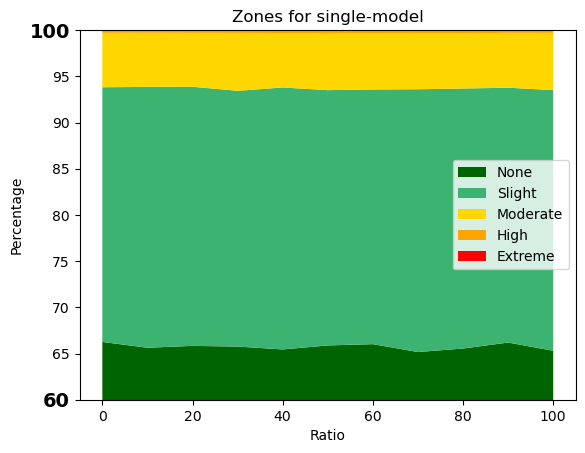

In [47]:

# Plot on top of each other
import matplotlib.pyplot as plt

def plot_area_plot(df, model_name):
    
    my_colors = ['darkgreen', 'mediumseagreen', 'gold', 'orange', 'red']
    my_labels =['None', 'Slight', 'Moderate', 'High', 'Extreme']
    
    x = df['ratio']
    
    y1 = df[f'percentage_counts_none_{model_name}']
    y2 = df[f'percentage_counts_slight_{model_name}']
    y3 = df[f'percentage_counts_moderate_{model_name}']
    y4 = df[f'percentage_counts_high_{model_name}']
    y5 = df[f'percentage_counts_extreme_{model_name}']
    
    plt.stackplot(x, y1, y2, y3, y4, y5, 
                  labels=my_labels,
                  colors=my_colors,
                  alpha = 1)
    
    plt.xlabel("Ratio")
    plt.ylabel("Percentage")
    plt.ylim(60, 100)
    plt.legend(loc='center right')
    plt.title(f"Zones for {model_name}-model")
    
    # Customize y-ticks
    yticks = plt.gca().get_yticks()
    yticks_labels = [f'{int(tick)}' for tick in yticks]
    plt.gca().set_yticklabels(yticks_labels)
    
    # Make the numbers 60 and 100 bold and larger
    for label in plt.gca().get_yticklabels():
        if label.get_text() in {'60', '100'}:
            label.set_fontweight('bold')
            label.set_fontsize(14)
    
    plt.show()

plottet_df = df_percentage_gr1
# plottet_df = df_percentage_gr2
plot_area_plot(plottet_df, model_name='single')
# plot_area_plot(plottet_df, model_name='base')
# plot_area_plot(plottet_df, model_name='tl')
# plot_area_plot(plottet_df, model_name='naive')


/tmp/ipykernel_3498667/46793566.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(yticks_labels)


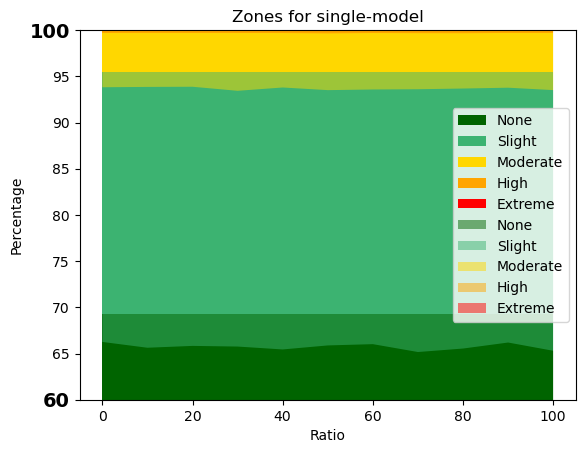

In [40]:

# Plot on top of each other
import matplotlib.pyplot as plt

def plot_area_plot(df, model_name1, model_name2):
    my_colors = ['darkgreen', 'mediumseagreen', 'gold', 'orange', 'red']
    my_colors2 = ['blue', 'gray', 'lightblue', 'cyan', 'pink']
    my_labels =['None', 'Slight', 'Moderate', 'High', 'Extreme']
    x = df['ratio']
    y1_1 = df[f'percentage_counts_none_{model_name1}']
    y2_1 = df[f'percentage_counts_slight_{model_name1}']
    y3_1 = df[f'percentage_counts_moderate_{model_name1}']
    y4_1 = df[f'percentage_counts_high_{model_name1}']
    y5_1 = df[f'percentage_counts_extreme_{model_name1}']
    
    plt.stackplot(x, y1_1, y2_1, y3_1, y4_1, y5_1, 
                  labels=my_labels,
                  colors=my_colors)
    
    y1_2 = df[f'percentage_counts_none_{model_name2}']
    y2_2 = df[f'percentage_counts_slight_{model_name2}']
    y3_2 = df[f'percentage_counts_moderate_{model_name2}']
    y4_2 = df[f'percentage_counts_high_{model_name2}']
    y5_2 = df[f'percentage_counts_extreme_{model_name2}']
    
    plt.stackplot(x, y1_2, y2_2, y3_2, y4_2, y5_2, 
                  labels=my_labels,
                  colors=my_colors,
                  alpha = 0.5)
    
    plt.xlabel("Ratio")
    plt.ylabel("Percentage")
    plt.ylim(60, 100)
    plt.legend(loc='center right')
    plt.title(f"Zones for {model_name2}-model")
    
    # Customize y-ticks
    yticks = plt.gca().get_yticks()
    yticks_labels = [f'{int(tick)}' for tick in yticks]
    plt.gca().set_yticklabels(yticks_labels)
    
    # Make the numbers 60 and 100 bold and larger
    for label in plt.gca().get_yticklabels():
        if label.get_text() in {'60', '100'}:
            label.set_fontweight('bold')
            label.set_fontsize(14)
    
    plt.show()

plottet_df = df_percentage_gr1
# plottet_df = df_percentage_gr2
plot_area_plot(plottet_df, model_name1='naive', model_name2='single')
# plot_area_plot(plottet_df, model_name='base')
# plot_area_plot(plottet_df, model_name='tl')
# plot_area_plot(plottet_df, model_name='naive')


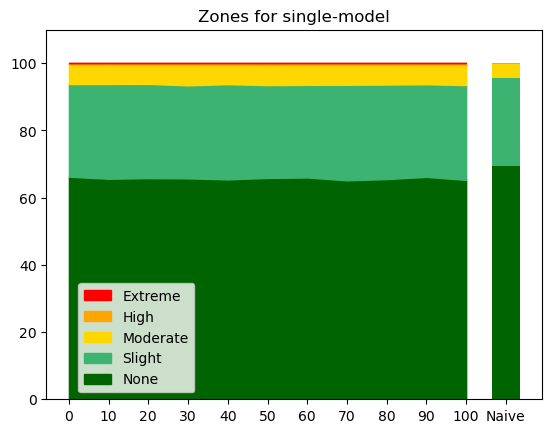

In [78]:
import matplotlib.pyplot as plt
import numpy as np

def plot_zones(df, model_name, model_naive='naive'):
    my_colors = ['darkgreen', 'mediumseagreen', 'gold', 'orange', 'red']
    my_labels = ['None', 'Slight', 'Moderate', 'High', 'Extreme']
    
    x = df['ratio']
    y1 = df[f'percentage_counts_none_{model_name}']
    y2 = df[f'percentage_counts_slight_{model_name}']
    y3 = df[f'percentage_counts_moderate_{model_name}']
    y4 = df[f'percentage_counts_high_{model_name}']
    y5 = df[f'percentage_counts_extreme_{model_name}']

    fig, ax = plt.subplots()
    my_alpha = 1
    # Stacked area plot
    ax.fill_between(x, 0, y1, color=my_colors[0], alpha=my_alpha, label=my_labels[0])
    ax.fill_between(x, y1, y1 + y2, color=my_colors[1], alpha=my_alpha, label=my_labels[1])
    ax.fill_between(x, y1 + y2, y1 + y2 + y3, color=my_colors[2], alpha=my_alpha, label=my_labels[2])
    ax.fill_between(x, y1 + y2 + y3, y1 + y2 + y3 + y4, color=my_colors[3], alpha=my_alpha, label=my_labels[3])
    ax.fill_between(x, y1 + y2 + y3 + y4, y1 + y2 + y3 + y4 + y5, color=my_colors[4], alpha=my_alpha, label=my_labels[4])
    
    # Data for naive model
    y1_naive = df[f'percentage_counts_none_{model_naive}'].iloc[0]
    y2_naive = df[f'percentage_counts_slight_{model_naive}'].iloc[0]
    y3_naive = df[f'percentage_counts_moderate_{model_naive}'].iloc[0]
    y4_naive = df[f'percentage_counts_high_{model_naive}'].iloc[0]
    y5_naive = df[f'percentage_counts_extreme_{model_naive}'].iloc[0]
    
    # Bar heights and labels
    bar_height = [y1_naive, y2_naive, y3_naive, y4_naive, y5_naive]
    
    # Plotting the bar
    bar_positions = [max(x) + 10]  # Positioning the bars adjacent to the plot
    bottom = 0
    bar_width = 7
    for height, color, label in zip(bar_height, my_colors, my_labels):
        ax.bar(bar_positions, height,width=bar_width, bottom=bottom, color=color, alpha=my_alpha) #, label=label + ' (naive)')
        bottom += height

    # Adding labels and legend
    ax.set_xticks(np.append(x, bar_positions))
    ax.set_xticklabels(list(map(str, x)) + ['Naive'])
    ax.set_ylim(0, max(sum(bar_height) * 1.1, 100))  # Adjust y-axis limit for better visibility
    # ax.legend()
    # plt.legend(loc='lower left')
    plt.title(f"Zones for {model_name}-model")
    # Reverse the order of handles and labels for the legend
    # Reverse the order of handles and labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='lower left', bbox_to_anchor=(0.05, 0.0))

    plt.show()


# Assuming df_percentage_gr1 is the DataFrame you are working with
plottet_df = df_percentage_gr1
# plot_zones(plottet_df, model_name='single', model_naive='naive')
plot_zones(plottet_df, model_name='single', model_naive='naive')

In [ ]:
# import matplotlib.pyplot as plt
# df_counts= pd.DataFrame
# # Calculate the percentages for each category in the naive stage
# df['total_counts_naive'] = (
#     df['counts_none_naive'] +
#     df['counts_slight_naive'] +
#     df['counts_moderate_naive'] +
#     df['counts_high_naive'] +
#     df['counts_extreme_naive']
# )

# df['percent_none'] = df['counts_none_naive'] / df['total_counts_naive'] * 100
# df['percent_slight'] = df['counts_slight_naive'] / df['total_counts_naive'] * 100
# df['percent_moderate'] = df['counts_moderate_naive'] / df['total_counts_naive'] * 100
# df['percent_high'] = df['counts_high_naive'] / df['total_counts_naive'] * 100
# df['percent_extreme'] = df['counts_extreme_naive'] / df['total_counts_naive'] * 100

# # Prepare the df for plotting
# plot_df = df[['ratio', 'percent_none', 'percent_slight', 'percent_moderate', 'percent_high', 'percent_extreme']]

# # Plot the df
# plt.figure(figsize=(12, 8))
# plt.scatter(plot_df['ratio'], plot_df['percent_extreme'], label='Extreme', color='purple')
# plt.scatter(plot_df['ratio'], plot_df['percent_high'], label='High', color='red')
# plt.scatter(plot_df['ratio'], plot_df['percent_moderate'], label='Moderate', color='orange')
# plt.scatter(plot_df['ratio'], plot_df['percent_slight'], label='Slight', color='green')
# plt.scatter(plot_df['ratio'], plot_df['percent_none'], label='None', color='blue')



# plt.xlabel('Ratio')
# plt.ylabel('Percentage')
# plt.title('Percentage Distribution by Ratio for Different Categories (Naive Stage)')
# plt.legend()
# plt.grid(True)
# plt.show()
